In [1]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [2]:
try:
    from math import prod
except:
    from functools import reduce
    prod = lambda coll: reduce(lambda x, y: x * y, coll, 1)

x_train.shape: (60000, 28, 28)
x_test.shape:  (10000, 28, 28)


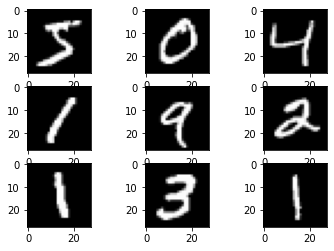

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'x_train.shape: {x_train.shape}\nx_test.shape:  {x_test.shape}')
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# Let's not fry our CPU just yet.
x_train = x_train[:6_000]
y_train = y_train[:6_000]
x_test = x_test[:1_000]
y_test = y_test[:1_000]

#### ~~I'd rather handle the shapes in the NN itself~~ I give up

In [5]:
x_train.shape = (x_train.shape[0], prod(x_train.shape[1:]))
x_test.shape = (x_test.shape[0], prod(x_test.shape[1:]))
print(f'x_train.shape: {x_train.shape}\nx_test.shape:  {x_test.shape}')

x_train.shape: (6000, 784)
x_test.shape:  (1000, 784)


In [6]:
model = Sequential()

# model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1:] + (1, ))))
model.add(Dense(100, activation='relu', input_shape=(prod(x_train.shape[1:]),)))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes

model.compile(
#     optimizer='adam',
    optimizer=SGD(lr=[1e-5, 1e-2, 1][-2]),
    loss='mean_squared_error', 
#     loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 81,285
Trainable params: 81,285
Non-trainable params: 0
_________________________________________________________________


In [7]:
early_stopping_monitor = EarlyStopping(patience=2)

# history = model.fit(x_train, y_train, validation_data=(x_test, y_test))
# history = model.fit(x_train, y_train, validation_split=0.3)
history = model.fit(x_train, y_train, validation_split=0.3, 
                    epochs=10, callbacks=[early_stopping_monitor])

Epoch 1/10
132/132 [==============================] - 26s 197ms/step - loss: 27.4367 - accuracy: 0.0705 - val_loss: 27.2345 - val_accuracy: 0.0667
Epoch 2/10
132/132 [==============================] - 28s 214ms/step - loss: 27.4365 - accuracy: 0.0855 - val_loss: 27.2344 - val_accuracy: 0.0911
Epoch 3/10
132/132 [==============================] - 25s 186ms/step - loss: 27.4366 - accuracy: 0.0931 - val_loss: 27.2345 - val_accuracy: 0.1083
Epoch 4/10
132/132 [==============================] - 28s 210ms/step - loss: 27.4364 - accuracy: 0.1155 - val_loss: 27.2339 - val_accuracy: 0.0906
Epoch 5/10
132/132 [==============================] - 25s 190ms/step - loss: 27.4360 - accuracy: 0.1060 - val_loss: 27.2348 - val_accuracy: 0.1333
Epoch 6/10
132/132 [==============================] - 25s 186ms/step - loss: 27.4367 - accuracy: 0.1155 - val_loss: 27.2345 - val_accuracy: 0.1272


In [8]:
model.save('models/python_intro_week3.h5')
# model = load_model('models/python_intro_week3.h5')

In [9]:
# # It does
# # I hope keras has something for this so I wouldn't need to write them by hand
# predictions = model.predict(x_test)
# acc = np.sum(np.equal(y_test, np.argmax(predictions, axis=1))) / y_test.shape[0]
# print(f"Accuracy: {acc}")
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

32/32 [==============================] - 4s 115ms/step - loss: 26.0135 - accuracy: 0.1060
Test loss: 26.013547897338867
Test accuracy: 0.10599999874830246


In [10]:
# model.evaluate(x=x_test, y=y_test)